## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import pickle


## Uploading datasets

In [2]:
path_prefix = ".\\dataset1\\"

In [3]:
df_names = pd.read_table(path_prefix+'id_information_mmsr.tsv')
df_names.head(2)
len(df_names)

10095

In [4]:
df_bert = pd.read_table(path_prefix+'id_lyrics_bert_mmsr.tsv')
df_bert.head(2)

,id,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,h48f46ZsT9h0Z5Dm,-0.015378,0.041258,-0.004096,-0.061025,-0.012853,0.028773,-0.045051,-0.016451,-0.007118,...,-0.042241,-0.014954,0.047022,-0.015661,-0.007859,0.016969,-0.021641,-0.003476,-0.012301,-0.022135
1,PV5EXN6AIVBqvsLO,0.040497,0.061796,-0.017192,-0.012942,-0.040331,0.019082,0.001662,-0.036522,-0.022991,...,-0.025968,-0.023056,-0.019058,0.010935,-0.010183,-0.011044,-0.036080,-0.002666,-0.005304,-0.016923


In [5]:
df_word2vec = pd.read_table(path_prefix+'id_lyrics_word2vec_mmsr.tsv')
df_word2vec.head(2)

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,vo7FwIGCk6YHfkIA,0.033718,0.014378,0.026128,0.042627,-0.048268,0.015804,0.032547,-0.020543,0.025851,...,-0.018858,0.016099,-0.040894,-0.005447,-0.016220,-0.014547,0.017679,-0.040378,-0.015388,-0.003768
1,KbiCjEDMzzHYn6zF,0.032313,0.013010,0.024825,0.028559,-0.024753,-0.007209,0.018488,-0.037101,0.031233,...,-0.044380,0.023839,-0.051918,0.023653,-0.000048,0.011242,0.023039,-0.017589,0.015194,-0.017180


In [6]:
df_tfidf = pd.read_table(path_prefix+'id_lyrics_tf-idf_mmsr.tsv')
df_tfidf.head(2)

,id,abl,accept,across,act,addict,afraid,age,ago,ah,...,yea,yeah,year,yellow,yes,yesterday,yet,yo,young,youth
0,h48f46ZsT9h0Z5Dm,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.149783,0.0,0.0,0.0,0.0
1,PV5EXN6AIVBqvsLO,0.0,0.0,0.0,0.0,0.0,0.327025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## 3 chosen songs

In [7]:
song1 = df_names[df_names['id'] == 'ziT77Si01mOb5oZg']; song1

,id,artist,song,album_name
10051,ziT77Si01mOb5oZg,Frank Sinatra,Jingle Bells,Ultimate Christmas


In [8]:
song2 = df_names[df_names['id'] == 'cVZd1wCtRYIqRnaV']; song2

,id,artist,song,album_name
6209,cVZd1wCtRYIqRnaV,Stevie Wonder,Happy Birthday,Hotter Than July


In [9]:
song3 = df_names[df_names['id'] == 'h0Jaex0Pdbn3aVXv']; song3

,id,artist,song,album_name
6970,h0Jaex0Pdbn3aVXv,Green Day,Wake Me Up When September Ends,American Idiot


## Function returns artist and song name with given id

In [10]:
def song_info(id_):
    return df_names[df_names['id'] == id_]

# Exercise 2

In [11]:
path_prefix = ".\\dataset2\\"

In [12]:
df_mfcc = pd.read_table(path_prefix+'id_mfcc_bow_mmsr.tsv')
df_mfcc.head(2)

,id,mfccB000,mfccB001,mfccB002,mfccB003,mfccB004,mfccB005,mfccB006,mfccB007,mfccB008,...,mfccB490,mfccB491,mfccB492,mfccB493,mfccB494,mfccB495,mfccB496,mfccB497,mfccB498,mfccB499
0,GDGURAgKxNPEuXzM,0.00000,0.0,2.096910,0.0,0.00000,0.0,1.982271,2.722634,0.69897,...,1.740363,2.604226,0.0,0.00000,1.30103,0.0,0.00000,0.000000,1.278754,2.235529
1,gdHmkEd0uy5HzhlM,0.69897,0.0,2.143015,0.0,0.30103,0.0,2.945961,2.139879,0.90309,...,1.653212,1.819544,0.0,0.30103,1.50515,0.0,0.30103,1.176091,2.371068,2.367356


In [13]:
df_blf_spectralcontrast = pd.read_table(path_prefix+'id_blf_spectralcontrast_mmsr.tsv')
df_blf_spectralcontrast.head(2)

,id,BLF_SPEC_CTRS000,BLF_SPEC_CTRS001,BLF_SPEC_CTRS002,BLF_SPEC_CTRS003,BLF_SPEC_CTRS004,BLF_SPEC_CTRS005,BLF_SPEC_CTRS006,BLF_SPEC_CTRS007,BLF_SPEC_CTRS008,...,BLF_SPEC_CTRS790,BLF_SPEC_CTRS791,BLF_SPEC_CTRS792,BLF_SPEC_CTRS793,BLF_SPEC_CTRS794,BLF_SPEC_CTRS795,BLF_SPEC_CTRS796,BLF_SPEC_CTRS797,BLF_SPEC_CTRS798,BLF_SPEC_CTRS799
0,01Yfj2T3YTwJ1Yfy,0.022039,0.024196,0.02515,0.027585,0.027636,0.028242,0.028864,0.028893,0.030540,...,0.016565,0.016715,0.017400,0.017658,0.018747,0.019526,0.020388,0.021293,0.023746,0.024963
1,01gyRHLquwXDlhkO,0.026550,0.029981,0.03121,0.033620,0.034753,0.035093,0.036650,0.037344,0.038178,...,0.016232,0.016667,0.016972,0.017353,0.018233,0.018639,0.019531,0.020057,0.021328,0.023968


## Task 2.1 Retrieval systems 
* Audio-based(\<similarity>, MFCC with BoW)
Similar to Text-based(\<similarity\>, \<feature\>), however choose as feature one of the representations of the MFCCs (BoW or statistical descriptors).\
  **𝑠𝑖𝑚(𝑞𝑢𝑒𝑟𝑦, 𝑡𝑎𝑟𝑔𝑒𝑡_𝑡𝑟𝑎𝑐𝑘) = <𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦> (<𝑓𝑒𝑎𝑡𝑢𝑟𝑒>(𝑞𝑢𝑒𝑟𝑦), <𝑓𝑒𝑎𝑡𝑢𝑟𝑒>(𝑡𝑎𝑟𝑔𝑒𝑡_𝑡𝑟𝑎𝑐𝑘))**

Furthermore, the implemented retrieval systems are similar to Audio-based(\<similarity\>, \<feature\>): 
* Audio-based(\<similarity\>, BLF spectral contrast)
* Audio-based(\<similarity\>, i-vectors 256)
* Audio-based(\<similarity\>, musicnn (DNN-based) )

In [14]:
song1_id = song1['id'].values[0]
song2_id = song2['id'].values[0]
song3_id = song3['id'].values[0]

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
## read all dataframes in when needed
path_prefix = ".\\dataset1\\"
feature = 'lyrics_tf-idf'
df_lyrics_tf_idf = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
feature = 'lyrics_bert'
df_lyrics_bert = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
feature = 'lyrics_word2vec'
df_lyrics_word2vec = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
path_prefix = ".\\dataset2\\"
feature = 'mfcc_bow'
df_mfcc_bow = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
feature = 'blf_spectralcontrast'
df_blf_spectralcontrast = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
feature = 'ivec256'
df_ivec256 = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")
feature = 'musicnn'
df_musicnn = pd.read_table(path_prefix+f"id_{feature}_mmsr.tsv")

# TODO: Normalize features to improve performance

In [71]:

def read_df(feature:str):
    if feature.startswith('lyrics'):
        if feature == 'lyrics_tf-idf':
            return df_lyrics_tf_idf
        elif feature == 'lyrics_bert':
            return df_lyrics_bert            
        elif feature == 'lyrics_word2vec':
            return df_lyrics_word2vec
        else:
            raise('feature not found')
    else:
        if feature == 'mfcc_bow':
            return df_mfcc_bow
        elif feature == 'blf_spectralcontrast':
            return df_blf_spectralcontrast            
        elif feature == 'ivec256':
            return df_ivec256
        elif feature == 'musicnn':
            return df_musicnn
 
        else:
            raise('feature not found')
    return


In [94]:

def recommend_songs(song_id:str, k:int, feature:str, similarity:str = 'cosine_similarity'): # recommender_system = None
    
    # random_baseline
    if feature == '-' or similarity == '-': 
        return df_names.loc[(df_names['id'] != song_id)].sample(n=k)    

    df = None
    tsv_features = ['mfcc_bow', 'blf_spectralcontrast', 'ivec256', 'musicnn', 'lyrics_tf-idf', 'lyrics_bert','lyrics_word2vec']
    algo_similarity = ['cosine_similarity','euclidean_distances']
    
    if feature not in tsv_features:
        raise(f'feature {feature} is not known to us. Please specify a one of these features: {tsv_features}') 
        
    df = read_df(feature)

    if similarity not in algo_similarity:
        raise(f'similarity {similarity} is not known to us. Please specify a one of these similarity functions: {algo_similarity}')
    
    #song_id = song['id'].values[0]
    song_vec = df.loc[df['id'] == song_id] # target song vector, make copy because we need to manipulate the feature vector separately
    df = df.loc[(df['id'] != song_id)].copy() # this dataset without target song
    if similarity == 'cosine_similarity':
        df['similarity'] = cosine_similarity(df.iloc[:, 1:], song_vec.iloc[:, 1:]) #similarity between songs from dataset and target song
    elif similarity == 'euclidean_distances':
        df['similarity'] = euclidean_distances(df.iloc[:, 1:], song_vec.iloc[:, 1:])
    

    df = df.sort_values(by='similarity', ascending=False).head(k)[['id', 'similarity']] #take k the greatest similarity values, we need id and similarity value
    result = pd.merge(df, df_names, how='left', on='id') #merge table to represent names of found songs
    return result

In [52]:
# song_id = song1['id'].values[0]
# recommend_songs(song = song1_id, k = 10, feature = 'mfcc_bow')

In [53]:
# song_id = song1['id'].values[0]
# recommend_songs(song=song_id, k=10, feature ='blf_spectralcontrast')

In [54]:
# song_id = song1['id'].values[0]
# recommend_songs(song= song_id, k =10, feature = 'ivec256')

In [42]:
# song_id = song1['id'].values[0]
# recommend_songs(song= song_id, k =10, feature = 'musicnn')

## Exercise 2\Task 2: Evaluation
**Accuracy:**
* Precision@k & Recall@k: according to the definition given in the lecture. Consider top k retrieved items. For the purposes of precision and recall calculation, a retrieved track is relevant to the query track if the two tracks have at least one genre in common. Allow for evaluation with different lengths of the returned lists (i.e., consider k as a parameter in the evaluation). Compute the average of Precision@k and of Recall@k over all possible query tracks. Plot Precision-Recall curve for each of the 8 evaluated systems by varying k in the interval [1, 100].

    * **Precision = TP / (TP + FP)**
    * **Recall = TP / (TP + FN)**

In [73]:
import ast
df_genres = pd.read_table(path_prefix+f"id_genres_mmsr.tsv")
df_genres['genre'] = df_genres['genre'].apply(lambda x : set(ast.literal_eval(x))) # transform string to list and then to set, because later on set comparition will be performed
df_genres.head(1)

,id,genre
0,01Yfj2T3YTwJ1Yfy,"{rock, christian rock}"


In [74]:
def get_genre(song_id):
    return df_genres.loc[df_genres['id'] == song_id]['genre'].values[0]
genre = get_genre(song1_id)
genre


{'bells', 'easy listening', 'jazz', 'lounge', 'swing'}

In [75]:
def enrich_resultset(resultset, target_genres, dataset):
    dataset = pd.merge(dataset,resultset['id'] , how='left', on='id', indicator='positive') # left join recommended songs to all songs. Therefore, the top k songs are (true or false) positive 
    dataset['positive'] = np.where(dataset.positive == 'both', True, False) # top k songs are most similar = recommender system recoginised as positive.
    mask = dataset['genre'].apply(lambda x:  True if x & target_genres else False ) # two tracks have at least one genre in common: to calculate if the similarity was right -> true or false postives.
    dataset['true'] = mask
    return dataset

def confusion_matrix(resultset):
    tp = ( resultset['positive'] & resultset['true'] ).values.sum()
    fp = ( resultset['positive']  & ~( resultset['true'] )).values.sum() 
    fn = (~( resultset['positive'] ) & ( resultset['true'] )).values.sum()
    tn = (~( resultset['positive']) & ~( resultset['true'] )).values.sum() 
    # print(f"k: {len() }, tp: {tp} fp: {fp} fn: {fn} tn: {tn}")
    precision = tp/(tp+fp) # TP / (TP + FP)
    recall = tp/(tp+fn) # TP / (TP + FN) 
    return recall.round(3), precision.round(3)



In [76]:
# test step of confusion matrix: 
song1_id = song1['id'].values[0]
resultset = recommend_songs(song1_id, 30, feature = 'musicnn') # _id
target_genres = get_genre(song1_id)
resultset = enrich_resultset(resultset, target_genres, df_genres) 
recall, precision = confusion_matrix(resultset) 
print(f"recall: {recall} precision: {precision}")

song1_id

recall: 0.006 precision: 0.267


'ziT77Si01mOb5oZg'

In [77]:
td = df_genres['genre'].head(10).copy()
td

0                               {rock, christian rock}
1               {death metal, rap, grindcore, hip hop}
2                                     {rock, pop punk}
3                 {techno, trance, progressive trance}
4    {europop, world, latin, italian pop, latin pop...
5    {new weird america, lo fi, soul, experimental,...
6    {neo soul, soul, hip hop, singer songwriter, r...
7    {punk, emo, post hardcore, melodic hardcore, p...
8    {smooth jazz, vocal jazz, jazz, swing, easy li...
9                          {smooth soul, sophisti pop}
Name: genre, dtype: object

In [131]:
def recall_precision_curve(feature:str, similarity:str = 'cosine_similarity', k:int=30, song_id:str = None):
    precision_list = []
    recall_list  = []
    song_list_of_genres = []
    if song_id:
        song_list_of_genres = df_genres.loc[df_genres['id'] == song_id].copy()
    else:
        song_list_of_genres = df_genres[0:10].copy() # test!

    
    for index, song in song_list_of_genres.iterrows():
        #print(song, song['id'])
        resultset = recommend_songs(song_id = song['id'], k = k, feature = feature) # task 1 + task 2 recommender systems! # .values[0]
        resultset = enrich_resultset(resultset, song['genre'], df_genres) 
        recall, precision = confusion_matrix(resultset) 
        precision_list.append(precision)
        recall_list.append(recall)
    
    # numpy.average (if just one song is selected this is not necessary, but done anyways)
    avg_recall = np.average(recall_list)
    avg_precision = np.average(precision_list)
    #avg_recall = recall_list
    #avg_precision = precision_list
    return  avg_recall, avg_precision

In [134]:
# test step of recall_precision_curve: 
song1_id = song1['id'].values[0]
precision_list, recall_list = recall_precision_curve(feature='musicnn', k=30, similarity = 'cosine_similarity')
print(precision_list,recall_list )

0.0088 0.5334000000000001


In [135]:
recommender_systems = {  'mfcc_bow': {'kind':'audio_based', 'feature': 'mfcc_bow', 'similarity': 'cosine_similarity'}
                        , 'blf_spectralcontrast': {'kind':'audio_based','feature': 'blf_spectralcontrast', 'similarity': 'cosine_similarity'}
                        , 'ivec256': {'kind':'audio_based','feature': 'ivec256', 'similarity': 'cosine_similarity'}
                        , 'musicnn': {'kind':'audio_based','feature': 'musicnn', 'similarity': 'cosine_similarity'}
                       , 'random': {'kind':'-','feature': '-', 'similarity': '-'}
                       , 'cos(tf-idf)': {'kind':'text_based','feature': 'lyrics_tf-idf', 'similarity': 'cosine_similarity'}
                       , 'cos(bert)': {'kind':'text_based','feature': 'lyrics_bert', 'similarity': 'cosine_similarity'}
                       , 'euclidean(word2vec)': {'kind':'text_based','feature': 'lyrics_word2vec', 'similarity': 'euclidean_distances'}
                      } 

recall_precision_curve_result = dict({ })
song_id = song1['id'].values[0]

# iterates all recommender systems and calcualtes the recall precision for k recommended songs for target song (k is within the intervall of k_interval)
def recall_precision_curve_foreach_rs(song:str = None, k_interval:[int, int]=[1, 10]):
    
    precision_list = []
    recall_list = []
    for rs in recommender_systems.keys():
        feature = recommender_systems[rs]['feature'];
        similarity = recommender_systems[rs]['similarity'];
        for k in np.arange(*k_interval,1): # make for each k one file
        
            print(f"recommender system: {rs}, feature: {feature}, similarity: {similarity}, k: {k}")
            recall_list, precision_list = recall_precision_curve(feature = feature, similarity = similarity, k= k, song_id = None )
            # TODO: save to file, instead of save to dictionary.
            recall_precision_curve_result[rs] = {'precision_list': precision_list,'recall_list': recall_list }

# calculate the precision recall over all recommender systems, with k recommended songs
recall_precision_curve_foreach_rs(song = None, k_interval =[1, 2] )


recommender system: mfcc_bow, feature: mfcc_bow, similarity: cosine_similarity, k: 1
recommender system: blf_spectralcontrast, feature: blf_spectralcontrast, similarity: cosine_similarity, k: 1
recommender system: ivec256, feature: ivec256, similarity: cosine_similarity, k: 1
recommender system: musicnn, feature: musicnn, similarity: cosine_similarity, k: 1
recommender system: random, feature: -, similarity: -, k: 1
recommender system: cos(tf-idf), feature: lyrics_tf-idf, similarity: cosine_similarity, k: 1


KeyboardInterrupt: 

In [24]:
print(recall_precision_curve_result['blf_spectralcontrast'])

{'precision_list': [0.0, 0.0, 0.0, 0.25, 0.2, 0.167, 0.143, 0.125, 0.222, 0.2, 0.182, 0.167, 0.154, 0.143, 0.133, 0.125, 0.118, 0.111, 0.105, 0.1, 0.095, 0.091, 0.13, 0.167, 0.16, 0.154, 0.185, 0.179, 0.172], 'recall_list': [0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003]}


In [ ]:
#To append to a pickle file
p={1:2}
q={3:4}
filename=f"rs_{k}_{}"
with open(filename, 'a+') as fp:
    pickle.dump(p,fp)
    pickle.dump(q,fp)

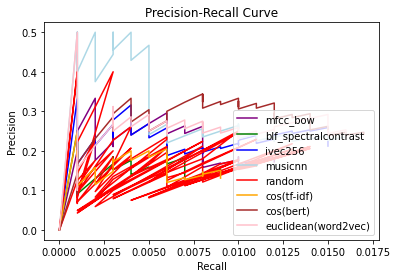

In [28]:
color_encoding = ['purple', 'green','blue','lightblue', 'red', 'orange', 'brown', 'pink']
fig, ax = plt.subplots()

for i, k in  enumerate(recommender_systems.keys()):
    precision_list = recall_precision_curve_result[k]['precision_list']
    recall_list = recall_precision_curve_result[k]['recall_list']
    ax.plot(recall_list, precision_list, color = color_encoding[i] )

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
# display plot
plt.legend(recommender_systems , loc ="lower right") # 'upper left'
